### 词云/TF-IDF 关键词提取/主题模型和文本分析/文本类型预测

In [1]:
##  Copyright private in 2018 
#  Modify Date: 
#          2018 - 9 - 18 
#  Purpose :  词云/TF-IDF 关键词提取/主题模型和文本分析/文本类型预测
# 
# ----------

In [1]:
import sys 
sys.version

'2.7.9 (default, Dec 10 2014, 12:28:03) [MSC v.1500 64 bit (AMD64)]'

In [8]:
#coding:utf-8
__author__ = 'naturelanguageprocessing'
import warnings
import numpy
warnings.filterwarnings("ignore")
import jieba
import codecs # codecs 提供的open 方法来指定打开的文件的语言编码，他会在读取的时候
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import matplotlib 
#%matplotlib inline  #嵌入中显示图片显示
matplotlib.rcParams['figure.figsize']  = (10.0,5.0)  # figure size 大小
from wordcloud import WordCloud # 词云

### 数据来着中国新闻网上的，短讯新闻

In [2]:
#df  = pd.read_csv('./data/entertainment_news.csv',names = ['url','contenttitle','content','label'],encoding = 'utf-8')
#df  = pd.read_csv(r'C:\Users\H155809\out.csv',encoding = 'utf-8')
#df  = pd.read_csv('C:\\Users\\H155809\\out.csv',encoding = 'utf-8')
df  = pd.read_csv("./data/military_news.csv",encoding = 'utf-8')
df  = df.dropna()  # drop掉可能为空的行数
content  = df.content.values.tolist()  #取出数据中的content列，通过values tolist 转成Python列表

#segment initial
segment = [] #new list - 存储所有分完词的list 
for line in content:
    try:
        segs = jieba.lcut(line)  # lcut:listcut - segs is list
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':  #新闻的文本>1非空 同时不等于换行 等赋值给segment 
                segment.append(seg)
    except:   #异常的话 print line 
        print(line) 
        continue

Building prefix dict from the default dictionary ...
Loading model from cache c:\users\yazhou\appdata\local\temp\jieba.cache
Loading model cost 1.630 seconds.
Prefix dict has been built succesfully.


In [3]:
cuted  = jieba.lcut(content[0])
df.content.values[1:2]

array([u'\u3000\u3000\u4e2d\u56fd\u56fd\u9632\u5de5\u4e1a\u4f01\u4e1a\u519b\u6c11\u878d\u5408\u4ea7\u4e1a\u8054\u76df8\u65e5\u5728\u5317\u4eac\u5ba3\u5e03\u6210\u7acb\u3002\u5218\u4e1c\u594e\u8bf4\uff0c\u9002\u65f6\u6210\u7acb\u8054\u76df\uff0c\u575a\u6301\u201c\u519b\u6c11\u878d\u5408\u3001\u51dd\u805a\u8d44\u6e90\u3001\u534f\u540c\u521b\u65b0\u3001\u670d\u52a1\u4ea7\u4e1a\u201d\u4e3a\u5b97\u65e8\uff0c\u6709\u671b\u63a8\u52a8\u519b\u6c11\u878d\u5408\u4ea7\u4e1a\u6548\u76ca\u6700\u5927\u5316\u3001\u52a9\u529b\u4f01\u4e1a\u81ea\u8eab\u6838\u5fc3\u4e1a\u52a1\u62d3\u5c55\u3002'],
      dtype=object)

In [4]:
print segment[0],segment[1],segment[2],segment[3],segment[4],segment[5],segment[6]

新华社 北京 日电 记者 董瑞丰 军民 融合


In [5]:
segment[0],segment[1],segment[2],segment[3],segment[4],segment[5],segment[6]

(u'\u65b0\u534e\u793e',
 u'\u5317\u4eac',
 u'\u65e5\u7535',
 u'\u8bb0\u8005',
 u'\u8463\u745e\u4e30',
 u'\u519b\u6c11',
 u'\u878d\u5408')

In [6]:
print content[0]

　　新华社北京1月8日电(记者董瑞丰)军民融合发展已经上升为国家战略，但现阶段国防工业企业军民融合深度发展仍面临一系列问题。中国国防工业企业协会会长刘东奎8日表示，将建立军转民与民参军、技术创新与成果转化、产业促进、金融服务和国际合作五大服务平台，促进军民资源双向转移、良性互动。


In [7]:
print content[1]

　　中国国防工业企业军民融合产业联盟8日在北京宣布成立。刘东奎说，适时成立联盟，坚持“军民融合、凝聚资源、协同创新、服务产业”为宗旨，有望推动军民融合产业效益最大化、助力企业自身核心业务拓展。


In [8]:
df.head()

,Unnamed: 0,content
0,0,新华社北京1月8日电(记者董瑞丰)军民融合发展已经上升为国家战略，但现阶段国防工业企业军...
1,1,中国国防工业企业军民融合产业联盟8日在北京宣布成立。刘东奎说，适时成立联盟，坚持“军民融...
2,2,数据显示，我国目前有十几万家民营高新技术企业，很多高新技术企业在新能源、新材料、电子信息...
3,3,对于现阶段军民融合面临的问题，刘东奎列举：从企业外部来看，军民融合管理体制不够顺畅，军民...
4,4,“国防科技工业是军民融合的天然载体和核心领域。”刘东奎说，未来要着力搭建军民协同创新展示...


# (一) 生成词云

### 2.Remove Stopwords

In [10]:
import pandas as pd 
words_df = pd.DataFrame({'segment':segment})

# 读取stopwords 表
stopwords = pd.read_csv("./data/stopwords_NLP.txt", index_col = False, quoting = 3,sep = "\t",names = ['stopword'], encoding = 'utf-8')
# stopwards.head()

# 3.词频统计
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]  #分完词后的segment 词中，不再停用词当中的词取出来保留。
#print words_df
# 按照sgement 来分组并通过聚合agg 来统计出的频次
words_stat = words_df.groupby(by = ['segment'])['segment'].agg({"计数":numpy.size}) # numpy.shape

# reset_index来拉平，并且是计数 这一列按照降序排序 ascending = False 
words_stat = words_stat.reset_index().sort_values(by = ["计数"],ascending = False)
words_stat.head() # 从高到低显示

,segment,计数
4149,中国,3661
39156,美国,1881
32122,海军,1880
42623,训练,1771
40575,航母,1768


### 4.画词云

In [11]:
#help(WordCloud)

In [12]:
#type(words_stat)
#words_stat.index

In [13]:
#words_stat.head(100).values

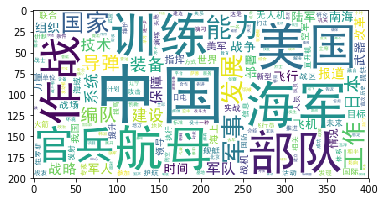

In [14]:
# 指定字体 - simhei.ttf, background is "white" , max font size is 80
"font_path 用于指定载入特定的字体文件..."
wordcloud = WordCloud(font_path = "./data/simhei.ttf",max_words = 200,background_color = "white",width = 400,height =200, max_font_size = 80)

# 取出一部分高频出现的词语做可视化 - Dict 
# x[0] : word  - 是segment的内容
# x[1] : frequency of word - Values  是 "计数"
word_frequency = {x[0]:x[1] for x in words_stat.head(1000).values}  # 取出前1000个词的values的数组构建一个字典
wordcloud      = wordcloud.fit_words(word_frequency)
# show the image
plt.imshow(wordcloud)
plt.show()

In [15]:
wordcloud.fit_words({x[0]:x[1] for x in words_stat.head(1000).values } )

In [17]:
help(wordcloud)

Help on WordCloud in module wordcloud.wordcloud object:

class WordCloud(__builtin__.object)
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (default=200)
 |      Height of the canvas.
 |  
 |  prefer_horizontal : float (default=0.90)
 |      The ratio of times to try horizontal fitting as opposed to vertical.
 |      If prefer_horizontal < 1, the algorithm will try rotating the word
 |      if it doesn't fit. (There is currently no built-in way to get only
 |      vertical words.)
 |  
 |  mask : nd-array or None (default=None)
 |      If not None, gives a binary mask on where to draw words. If mask is not
 |      None, width and height

### ５.自定义背景图做词云的背景　－　白底

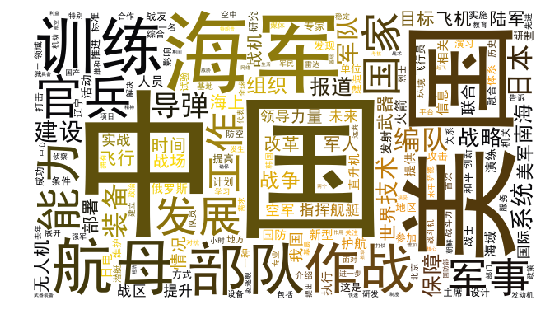

In [16]:
# import lib functions 
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (9.0, 6.0)  # Fig size 

from wordcloud import WordCloud,ImageColorGenerator  # Color Generator 
# 读入图片作为模板
bimg  = imread('./image/entertainment.png') 

# wordcloud 初始化: background, font and max font size ； mask 以上述图片作为模板； font_path  = 'data/simhei.ttf 微软雅黑字体
wordcloud = WordCloud(background_color = 'white', mask = bimg, font_path  = 'data/simhei.ttf', max_font_size = 200 )
word_frequency = {x[0]:x[1] for x in words_stat.head(1000).values}  # 取出前1000个词的values 的数组
wordcloud      = wordcloud.fit_words(word_frequency)

bimgColors     = ImageColorGenerator(bimg)  # 通过导入的图片来生成颜色
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func = bimgColors))  # 用现有的图片比重新生成word cloud 更快
plt.show()

# (二) 中文自然语言处理文本分析

### 1.关键词提取  - based on TF - IDF:基于词频的

In [9]:
### based on TF-IDF 
## function : jieba.analyse.extract_tags(sentence, topK = 20, withWeight = False, allowPOS= ())
## sentence is tested text 
## TopK 返回几个权重最大的几个关键词, default value  = 20
## withWeight 决定是否返回关键词的权重， default value  = False 
## allowPOS 包含指定的词性； 名词或形容词，  default value  = NULL 即不筛选



In [10]:
import jieba.analyse as analyse 
import pandas as pd
df  = pd.read_csv('./data/technology_news.csv',encoding = 'utf-8')
df  = df.dropna()  # drop掉可能为空的行数
lines   = df.content.values.tolist()  #取出数据中的content列，通过values tolist 转成Python列表

# 利用join 函数将所有的文本拼接在一起
content  = "".join(lines)

# --
# 按照空格打印出前30出现频率最高的词
# 按照TF - IDF 计算值抽取出高频的词 - extract_tags()
print "在技术类新闻中出现最高频率的前30个词分别是："
%time print " ".join(analyse.extract_tags(content,topK = 30, withWeight = False, allowPOS = () ))

在技术类新闻中出现最高频率的前30个词分别是：
用户 2016 互联网 手机 平台 人工智能 百度 2017 智能 技术 数据 360 服务 直播 产品 企业 安全 视频 移动 应用 网络 行业 游戏 机器人 电商 内容 中国 领域 通过 发展
Wall time: 22.6 s


In [16]:
help(analyse)

Help on package jieba.analyse in jieba:

NAME
    jieba.analyse

FILE
    c:\python27\lib\site-packages\jieba\analyse\__init__.py

PACKAGE CONTENTS
    analyzer
    textrank
    tfidf

FUNCTIONS
    set_stop_words(stop_words_path)

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    default_textrank = <jieba.analyse.textrank.TextRank object>
    default_tfidf = <jieba.analyse.tfidf.TFIDF object>




### 2.基于TextRank提取关键词  

In [28]:
#%time print "".join(jieba.analyse.textrank(content,topK = 20, withWeight = False, allowPOS = ('ns','n','vn','v')) )# 默认是过滤词性的
%time print " ".join(analyse.textrank(content,topK =30,withWeight = False,allowPOS = ('ns')))
## 
## 1. 将待抽取关键词的文本进行分类
## 2. 以固定窗口大小（default value = 5 ）, 词与词之间的共同出现的关系构建图
## 3. 计算图中节点的pagerank
## 4. 算法计算比TF-IDF 速度慢，

用户 技术 手机 平台 互联网 企业 数据 产品 智能 市场 行业 公司 百度 内容 网络 领域 人工智能 科技 全球 游戏 信息 视频 产业 业务 机器人 系统 方面 品牌 国内 体验
Wall time: 2min 44s


In [30]:
import jieba.analyse as analyse
import pandas as pd
df = pd.read_csv("./data/sports_news.csv", encoding = 'utf-8')
df = df.dropna()
lines    = df.content.values.tolist()
content  = " ".join(lines)

In [16]:
# print - allowPOS 返回词性。默认是过滤词性  v: 动词, n:名词
print "通过Textrank提取主题关键词:"
%time print " ".join(analyse.textrank(content,topK = 20, withWeight = False, allowPOS = ('v','n') ))

通过Textrank提取主题关键词:
足球 球员 赛事 球队 俱乐部 没有 进行 表示 成为 选手 冠军 国际 世界 项目 运动员 记者 球迷 希望 参加 获得
Wall time: 4min 27s


### 3.LDA 主题模型 - 无监督学习

In [16]:
###　无监督学习　－　抽取一定数量的主题，每个主题的权重从到大到小显示出来
###　找到一堆文本中的主题，发现用户都在关心什么话题

In [2]:
from gensim import corpora, models, similarities
import gensim

c:\python27\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### 3.1载入停用词

In [3]:
# load stopwards 
stopwords = pd.read_csv("./data/stopwords_NLP.txt", index_col = False, quoting = 3,sep = "\t", names = ['stopword'], encoding = 'utf-8')
stopwords = stopwords['stopword'].values

In [4]:
len(stopwords)

2613

### 转化成合适的数据格式

In [11]:
# 转化成合适的数据格式
# 将文本内容处理成固定的格式，一个包含句子的List，每个list中的元素是分词后的词list；
# [[第，一，条，新闻，在这里]， [第二条新闻在这里]， [这是在做什么，]]
#
import jieba.analyse as analyse 
import pandas as pd
df  = pd.read_csv('./data/technology_news.csv',encoding = 'utf-8')
df  = df.dropna()  # drop掉可能为空的行数
lines   = df.content.values.tolist()  #取出数据中的content列，通过values tolist 转成Python列表

sentences = []
for line in lines:
    try:
        segs = jieba.lcut(line)  # jieba分词 - linecut 
        segs = filter(lambda x:len(x)>1, segs)  # 分词后词的数量比1小的是空，filter 掉不需要。
        segs = filter(lambda x:x not in stopwords, segs)  # 分词完的词在stopwords中，同样不需要
        sentences.append(segs)
    except Exception,e:
        print line 
        continue

In [28]:
## check 
for word in sentences[4]:
    print word

韩国 大学生 联合会 日本 ESC 竞社 跨国 支持 UCG 走出 国门 一项 国际性 高校 赛事 中日韩 各国 顶尖 高校 选手 UCG 舞台 谱写 一首 亚洲 高校 竞之歌
technology


### 3.2 Bag of Words Model - 词袋模型

In [7]:
#bag of words - 词袋模型
dictonary = corpora.Dictionary(sentences) # 把 sentences 中的词建成字典(word ->index 映射)
# 通过过词袋模型 将文本转化成数字, 学习下来新的词 - 
corpus    = [dictonary.doc2bow(sentence) for sentence in sentences]


### 3.3 LDA 建模

In [23]:
# 
# topK = 20个主题 and corpus 表示设定好的格式数据
lda = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = dictonary, num_topics = 20 )

# Topk = 10 and 3nd 分类
# 打印出第3种分类，及该分类中的前10个高频词及权重（权重由大到小显示）
print lda.print_topic(3,topn = 10)

0.019*"小米" + 0.018*"京东" + 0.012*"OTT" + 0.011*"数据安全" + 0.008*"保护" + 0.008*"商品" + 0.006*"政务" + 0.006*"消费者" + 0.005*"武器" + 0.005*"价格"


In [24]:
#help(lda.get_document_topics)

In [25]:
# 打印出主题，主题数目设定为20 ,每个主题里面的数量是8 - 可作为关键主题和信息的提取
for topic in lda.print_topics(num_topics  = 20, num_words = 8):
    print topic[1]


0.028*"网络" + 0.024*"城市" + 0.021*"数据" + 0.013*"报告" + 0.012*"宽带" + 0.011*"智慧" + 0.010*"电信" + 0.010*"建设"
0.014*"系统" + 0.011*"技术" + 0.010*"手机" + 0.008*"功能" + 0.008*"摄像头" + 0.008*"设计" + 0.008*"采用" + 0.007*"充电"
0.033*"人工智能" + 0.032*"智能" + 0.026*"技术" + 0.014*"机器人" + 0.014*"数据" + 0.011*"百度" + 0.009*"学习" + 0.008*"服务"
0.019*"小米" + 0.018*"京东" + 0.012*"OTT" + 0.011*"数据安全" + 0.008*"保护" + 0.008*"商品" + 0.006*"政务" + 0.006*"消费者"
0.024*"企业" + 0.023*"数据" + 0.020*"发展" + 0.018*"互联网" + 0.015*"创新" + 0.013*"产业" + 0.012*"技术" + 0.012*"领域"
0.025*"支付" + 0.019*"亿元" + 0.019*"乐视" + 0.010*"诈骗" + 0.008*"手机" + 0.007*"万元" + 0.007*"交易" + 0.007*"人民币"
0.038*"直播" + 0.028*"内容" + 0.026*"视频" + 0.022*"平台" + 0.016*"媒体" + 0.014*"VR" + 0.010*"分享" + 0.009*"广告"
0.067*"用户" + 0.018*"信息" + 0.009*"搜索" + 0.009*"内容" + 0.009*"视频" + 0.009*"平台" + 0.008*"数据" + 0.006*"推荐"
0.015*"技术" + 0.012*"网络" + 0.011*"电视" + 0.011*"全球" + 0.009*"5G" + 0.008*"发布" + 0.007*"终端" + 0.007*"大会"
0.077*"游戏" + 0.014*"手机" + 0.013*"苹果" + 0.011*"独立" + 0.011*"玩家" + 0.007*"

# (三) 用机器学习的方法处理中文文本

### 1. 准备数据

In [16]:
##　准备数据
import jieba
import pandas as pd 

# df_technology
df_technology  = pd.read_csv("./data/technology_news.csv", encoding = 'utf-8')
df_technology  = df_technology.dropna() # 取消可能为空的行数

# df_car
df_car  = pd.read_csv("./data/car_news.csv", encoding = 'utf-8')
df_car  = df_car.dropna()

# df_entertainment 
df_entertainment   = pd.read_csv("./data/entertainment_news.csv", encoding = 'utf-8')
df_entertainment   = df_entertainment.dropna()

# 
df_sprots   = pd.read_csv("./data/sports_news.csv", encoding = 'utf-8')
df_sprots   = df_sprots.dropna()

#
df_military   = pd.read_csv("./data/military_news.csv", encoding = 'utf-8')
df_military   = df_military.dropna()

In [17]:
# 每个种类提取一定数量的文本样本记录
technology  = df_technology.content.values.tolist()[100:2100]
car  = df_car.content.values.tolist()[100:2100]

entertainment  = df_entertainment.content.values.tolist()[100:2100]
sprots  = df_sprots.content.values.tolist()[100:2100]

military = df_military.content.values.tolist()[100:2100]

In [18]:
# print 1 records ramdomly
print "娱乐数据个别样本：\n",entertainment[11]
print "运动数据个边样本:\n",sprots[1]
print "军事题材的个别样本:\n",military[11]

娱乐数据个别样本：
　　因此，有关部门如果真想改善“电影生态”，那么，请放下大棒，拿起喷壶，满腔热情地去浇灌眼前这片网络评论的园地吧！□ 眉间尺
运动数据个边样本:
　　福州市体育总会秘书长王晖说，福建天信职业足球俱乐部将给福州再添文化名片，将推动福州市建立青训体系，为福州足球培养后备人才，传播健康积极的足球文化。
军事题材的个别样本:
　　2014年11月底，时任中国国防部新闻发言人耿雁生首次证实中国海军一艘潜艇曾赴亚丁湾、索马里海域护航，期间两次技术停靠斯里兰卡。他强调，“潜艇靠港进行补给和休整，这是各国海军的通行做法。”


### 2 分词与中文文本分类

In [19]:
# load stopwards 
stopwords = pd.read_csv("./data/stopwords_NLP.txt", index_col = False,names =['stopword'],encoding = 'utf-8',quoting = 3,sep = "\t") # reading 
stopwords = stopwords['stopword'].values # load values 


### 2.1 ML数据集的预处理:去掉空格并打上标签

In [30]:
# Remove stopwords in fucntion 
def preprocess_text(content_lines,sentences,category):
    for line in content_lines:
        try:
            segs = jieba.lcut(line)
            segs = filter(lambda x:len(x)>1, segs)  # 空格 清掉
            segs = filter(lambda x:x not in stopwords, segs)
             
            # 把 sentences 里面的词通过空格链接起来，并打上category 的标签
            sentences.append( (" ".join(segs), category) )
        except Exception, e:
            print line
            continue 

# generated date 
sentences =[]

# 将全部的数据传进来做数据的预处理，并为各个种类带上标签： ‘technology’ and 'car' and so on 
preprocess_text(technology,sentences,'technology')
preprocess_text(car,sentences,'car')
preprocess_text(sprots,sentences,'sprots')
preprocess_text(military,sentences,'military')
preprocess_text(entertainment,sentences,'entertainment')

### 3. 将数据分成测试数据集合和训练数据集之前，先提前打乱数据集合

In [93]:
# 将数据分成测试数据集合和训练数据集之前，先提前打乱数据集合
import random
random.shuffle(sentences)  # 乱序

# print 
for sentence in sentences[:2]: # sentences 是由内容和标签组成一个样本，由多个样本组成的list 
    print sentence[0],sentence[1]

俱乐部 发生 球员 受伤 上场 情况 影响 联赛 足协 给出 预案 sprots
为国足 击败 克罗地亚队 一战 关键 追平 一球 小将 王靖斌 入选 强赛 期间 备受 外界 质疑 后卫 任航 回到 国足 集训 名单 这份 网传 名单 中国足协 最终 证实 sprots


In [79]:
for content in sentences[0:3]:
    print "文本内容是:",content[0],"=>对应的标签是:<<",content[1],">>"

文本内容是: 1997 网易 邮箱 持续 多年 电子邮件 领域 投入 创新 推动 中国 电子邮件 产业 发展 做出 诸多 贡献 网易 邮箱 战略 产品 邮箱 大师 发展 支持 市场 主流 邮箱 品牌 努力 邮件 服务 打造 极致 用户 体验 =>对应的标签是:<< technology >>
文本内容是: 五角大楼 发言人 罗斯 中国 轰炸机 评论 补充 持续 关注 中国 区域 一系列 军事 活动 =>对应的标签是:<< military >>
文本内容是: 广州 市消委会 中学生 消费 比例 电子产品 消费 878 元排 第一 服装 757 书本 文具 427 休闲 娱乐 320 总体 中学生 电子产品 衣服 支出 31.2% 26.9% 书本 文具 15.2% 休闲 娱乐 11.4% =>对应的标签是:<< technology >>


In [56]:
for content in sentences[0]:
    print "content >>>",content[0]

content >>> 南
content >>> m


### 4.Split Data into Train and Test Data Serts 

In [94]:
# Split Data into Train and Test Data Serts 
from sklearn.model_selection import train_test_split

# 拉链函数zip来把数据的文本内容赋值给x, 标签  ‘technology’ and 'car' and so on  赋值给我label: y

x,y  = zip(*sentences) # x 是全部的文本，y是全部的标签
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 200)

# output 
len(x_train)

7500

In [81]:
len(x_test)

2500

### 5.通过词袋模型对文本进行特征提取，找到每个词对应的下标,并以下标作为向量

In [95]:
from sklearn.feature_extraction.text import CountVectorizer  # 向量化计数器

# 在上述通过空格衔接起来的词中取出4000个词，通过CountVectorizer 来找到每个词对应的词向量。该向量统计也会考虑每个词出现的频次
vec  = CountVectorizer(analyzer = 'word', # 按照空格链接起来的词
                      max_features = 4000) #  取出最高频的4000 个词，并以4000词的对应下标值组成一个向量

# 用训练集做fit
vec.fit(x_train)

# 将字符串的np数组x（词语或者一句话）转化成向量
def get_features(x):
    vec.transform(x)

In [86]:
temp = ["我 是 中国 人"]
import numpy as np
vec.transform(np.array(temp))  # 词向量映射成1*4000的词向量

<1x4000 sparse matrix of type '<type 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

### 6. import classifiter to fit data 

### 6.1 导入朴素贝叶斯分类器来训练数据

In [96]:
#  import多项式的朴素贝叶斯模型作为分类器来训练模型
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [97]:
# 将训练文本转化成向量的x_train 丢进来，及标签y_train 作为训练
classifier.fit(vec.transform(x_train),y_train) # 训练文本转化成向量的x_train 丢进

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [98]:
### 计算准确率 on test data sets 
classifier.score(vec.transform(x_test),y_test)

0.8732

In [91]:
## length of x_test data sets 
len(x_test)

2500

### 7. 在特征方面引入N-gram 模型做分词处理，N =1,2 : ngram_range = (1,3)，并加大词表数量
####　N = 2 把“我是”“中国” 等加进来作为特征，N =3 把“我是中”，“国人是”
#### N =2,3 的数据不会太密集，所以不容易出现过拟合

In [99]:
from sklearn.feature_extraction.text import CountVectorizer  # 向量化计数器

vec  = CountVectorizer(analyzer = 'word', # 按照空格链接起来的词
                      ngram_range = (1,3), # N-gram 模型 N = 1,2
                     max_features = 20000) #  加大词表数量

# 用训练集做fit
vec.fit(x_train)

# 将字符串的np数组x（词语）转化成向量
def get_features(x):
    x.transform(x)

In [101]:
#训练过程
classifier = MultinomialNB()
# 将训练文本转化成向量的x_train 丢进来，及标签y_train 作为训练
classifier.fit(vec.transform(x_train),y_train)
### 计算准确率 on test data sets 
classifier.score(vec.transform(x_test),y_test)

0.9084

In [86]:
from sklearn.model_selection import StratifiedKFold
X1 = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y1 = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X1, y1)
print ">>skf is :",skf
for train_index,test_index in skf.split(X1,y1):
    X1_train,X1_test = X1[train_index], X1[test_index]
    y1_train,y1_test = y1[train_index],y1[test_index]
    
print "X_train", X1_train
print "X_test", X1_test
print "y_train", y1_train
print "y_test", y1_test

>>skf is : StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
X_train [[1 2]
 [1 2]]
X_test [[3 4]
 [3 4]]
y_train [0 1]
y_test [0 1]


### 8.随机乱序后，数据集变得更随机 - 这样很好
### 通过交叉验证集合fit Model - crossvalidation ，kfold = 5 时最后保证每一折的数据都是均衡


In [87]:
#help(StratifiedKFold)

In [106]:
# 当前数据为4个种类，这里KFold 成4个部分，三个部分做trian data sets, 1个部分做test data sets
# 通过 KFold 来分类数据- 每1折的数据尽量数据均衡

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

# K 层的交叉验证
def stratifiedkfold_cv(x,y,clf_class,shuffle= True,n_folds = 5,**kwargs):
    stratifiedk_fold = StratifiedKFold(n_splits  = n_folds, shuffle = shuffle) # 按照y 标签来类K 折
    
    y_pred  = y[:]   
    for train_index,test_index in stratifiedk_fold.split(x,y):
        X_train, X_test =  x[train_index],x[test_index] # K-1折做数据训练，1折做测试数据集
        y_train         =  y[train_index]
        clf  = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        
        y_pred[test_index] = clf.predict(X_test)
    return y_pred 

In [107]:
vec_x = vec.transform(x)


In [108]:

#help(precision_score)

In [112]:
NB = MultinomialNB
y_true = y
y_pred = stratifiedkfold_cv(vec.transform(x),np.array(y),NB)
print "%","%f" %((precision_score(y_true,y_pred,labels = None, average = 'macro'))*100)
print "通过在K=5折的交叉验证，可以看到在5个类别上的结果平均准确率是上面的结果:"

% 91.412284
通过在K=5折的交叉验证，可以看到在5个类别上的结果平均准确率是上面的结果:


# (四) 整理文本分类Class

In [ ]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  MultinomialNB

In [101]:
class TextClassifier():
    
    def __init__(self,classifier = MultinomialNB()) :  # 默认是朴素贝叶斯模型
        self.classifier = classifier 
        self.vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (1,3), max_features = 2000)
        
    def features(self,X):
        return self.vectorizer.transform(X)  # 每一句通过查字典化成向量
    
    def fit(self,X,y):
        self.vectorizer.fit(X)  # 先在训练集上转成文本
        self.classifier.fit(self.features(X), y)  # 再将训练集文本转成向量
        
    def predict(self,x):
        return self.classifier.predict(self.features([x]))
    
    def score(self,X,y): # 打分
        return self.classifier.score(self.features(X),y)

In [102]:
## class的调用
classifier  = TextClassifier()
classifier.fit(x_train,y_train)

# prediction & score 
print(classifier.predict('融资　是　创业　很难　做到　的　事情'))
print(classifier.score(x_test,y_test))

['technology']
0.8532


# (五) SVM Text Classifier 

In [103]:
# 
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(vec.transform(x_train),  y_train)
svm.score(vec.transform(x_test), y_test)

0.8404

In [104]:
# RBF Kernal - 高斯核 -速度比较慢
from sklearn.svm import SVC
svm = SVC() # 默认RBF Kernal
svm.fit(vec.transform(x_train),  y_train)
svm.score(vec.transform(x_test), y_test)

0.1936

In [105]:
# 换一个特征提取模型
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [106]:
class TextClassifier():
    
    def __init__(self,classifier = SVC(kernel = 'linear')) :  # 默认是线性SVM
        self.classifier = classifier 
        self.vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1,3), max_features = 2000)
        
    def features(self,X):
        return self.vectorizer.transform(X)  # 将文本转化成向量
    
    def fit(self,X,y):
        self.vectorizer.fit(X)
        self.classifier.fit(self.features(X), y)
        
    def predict(self,x):
        return self.classifier.predict(self.features([x]))
    
    def score(self,X,y):
        return self.classifier.score(self.features(X),y)

In [107]:
## class的调用
classifier  = TextClassifier()
classifier.fit(x_train,y_train)

# prediction & score 
print(classifier.predict('拿到 年终奖 高高兴兴 回家 过年 发现 微信 群里 红包 满天飞'))
print(classifier.score(x_test,y_test))

['entertainment']
0.8476
